In [25]:
#librerias
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import cholesky

In [26]:
#Integración numerica
s=1000 #Partición integración (modificable)
def n_integral(f,a,b,s=1000):
    valor=(f[0]+f[s-1])/2
    for k in range (1,s-1):
        valor=valor + f[k]
    valor=valor*(b-a)/s
    return valor

Problema 1: 

(1) Implementación

a)

In [27]:
n=100 #numero de discreticazión (modificable)
a=0 #Inicio del dominio (modificable)
b=1 # final del dominio (modificable)
def f(x): 
    #Función del problema (modificable)
    return -x**2+x+2

In [28]:
#Posición especifica de la discretización
def xi(i):
    return a+i*(b-a)/n

In [29]:
#funciones phi
def phi(x,i):
    if x>= xi(i-1) and x<= xi(i):
        return (x-xi(i-1))/(xi(i)-xi(i-1))
    if x>xi(i) and x<=xi(i+1):
        return (xi(i+1)-x)/(xi(i+1)-xi(i))
    else:
        return 0
#derivada de la funciones phi  
def derivada_phi(x,i):
    if x>= xi(i-1) and x<= xi(i):
        return 1/(xi(i)-xi(i-1))
    if x>xi(i) and x<=xi(i+1):
        return -1/(xi(i+1)-xi(i))
    else:
        return 0
#funciones phi como vector
def phi_vec(i,s):
    v=np.zeros((s,1))
    for k in range(0,s):
        v[k]=phi(a+k*(b-a)/(s-1),i)
    return v
#derivada de la funciones phi como vector
def derivada_phi_vec(i,s):
    v=np.zeros((s,1))
    for k in range(0,s):
        v[k]=derivada_phi(a+k*(b-a)/(s-1),i)
    return v
#vectoriación de funciones
def f_vec(f,s):
    v=np.zeros((s,1))
    for k in range(0,s):
        v[k]=f(a+k*(b-a)/(s-1))
    return v
#coeficiente ai    
def ai(i):
    v=np.zeros((s,1))
    p1=phi_vec(i,s)
    p2=derivada_phi_vec(i,s)
    for k in range(0,s):
        v[k]=p1[k]**2+p2[k]**2
    return n_integral(v,a,b,s)
#coeficiente bi 
def bi(i):
    v=np.zeros((s,1))
    p1=phi_vec(i-1,s)
    p2=phi_vec(i,s)
    p3=derivada_phi_vec(i-1,s)
    p4=derivada_phi_vec(i,s)
    for k in range(0,s):
        v[k]=p1[k]*p2[k]+p3[k]*p4[k]
    return n_integral(v,a,b,s)
#coeficiente fi 
def fi(i):
    v=f_vec(f,s)
    p=phi_vec(i,s)
    for k in range(0,s):
        v[k]=p[k]*v[k]
    return n_integral(v,a,b,s)

In [30]:
M=np.zeros((n-1,n-1)) #Matriz en los que pondremos los valores de nuestro sistema
F=np.zeros((n-1,1)) #Vector de valore de f_i
i=1
for k in range(1,n):
    F[k-1,0]=fi(k)
    M[k-1,k-1]=ai(k)
    if k!=1:
        M[k-1,k-2]=bi(k)
    if k!= n-1:
        M[k-1,k]=bi(k+1)

In [31]:
M

array([[195.00669142, -99.99835022,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [-99.99835022, 200.00668947, -99.99834926, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , -99.99834926, 200.00668757, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 200.00668757,
        -99.99834926,   0.        ],
       [  0.        ,   0.        ,   0.        , ..., -99.99834926,
        200.00668947, -99.99835022],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        -99.99835022, 195.00669142]])

In [70]:
#Método de Cholesky
def cholesky(M):
    L=np.zeros((n-1,n-1)) #Matriz en los que pondremos los valores de nuestro sistema
    L[0,0]=M[0,0]**(1/2)
    for j in range(1,n-1):
        L[j,0]=M[0,j]/L[0,0]
    L[1,1]=(M[1,1]-L[1,0]**2)**(1/2)
    for j in range(1,n-1):
        L[j,1]=(M[1,j]-L[1,0]*L[j,0])/L[1,1]
    suma=0
    suma_diag=0
    for k in range(1,n-1):
        for r in range (0,k):
            suma=suma+ L[k,r]**2
        L[k,k]=(M[k,k]-suma)**(1/2)
        suma=0
        for j in range(0,n-1):
            for r in range (0,k):
                suma=suma +L[k,r]*L[j,r]
            L[j,k]=(M[k,j]-suma)/L[k,k]
            suma=0   
    #Resolveremos ahora Ly=F
    y=np.zeros((n-1,1))
    y[0,0]=F[0,0]/L[0,0]
    suma=0
    for i in range(1,n-1):
        for j in range(0,i):
            suma=suma+L[i,j]*y[j,0]
        y[i,0]=(F[i,0]-suma)/L[i,i]
        suma=0
    #Resolveremos ahora  L^{T}x=y
    LT=np.transpose(L)
    X=np.zeros((n-1,1))
    X[n-2,0]=F[n-2,0]/LT[n-2,n-2]
    suma=0
    for i in reversed(range(0,n-2)):
        for j in reversed(range(i+1,n-1)):
            suma=suma+LT[i,j]*X[j,0]
        X[i,0]=(y[i,0]-suma)/L[i,i]
        suma=0
    return X

In [74]:
X=cholesky(M)

In [75]:
def uh(x):
    suma=0
    for i in range(1,n):
        suma=suma+X[i-1]*phi(x,i)
    return suma

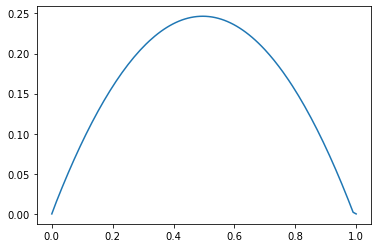

In [73]:
x = np.linspace(0, 1, num=1000)
plt.plot(x,[uh(j) for j in x])